# Assignment Week 2 

* Answer each question completely. 
* Include your code and summarize what you see in a brief narrative.

__Charting:__
Remember to make your charts as self-sufficient as possible (i.e., labels, titles, lack of clutter)  

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/car_prices/car_prices.csv', low_memory=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493484 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547043 non-null  object 
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558837 non-null  object 
 14  sellingprice  558837 non-null  int64  
 15  saledate      558837 non-null  object 
dtypes: float64(1), int64(2), object(13)
memory usage: 68.2+ MB


# Data Description:
- year: year the car was built (e.g., the model year)  
- make: the manufacturer. 
- model: specific model of the car  
- trim: subtype of the car model. 
- body: body style of the car. 
- transmission: type of transmission  
- state: state car is registered. 
- condition: numerical rating of the condition, higher is better.  
- odometer: number of miles the car has been driven.   
- color: color of the car.  
- interior: type of interior (e.g., seats). 
- mmr: estimated wholesale price of the car if auctioned.  
- sellingprice: actual sales price of the car.

## Question 1. Determine the number of missing values in each column.

In [33]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 4
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

The feature `year`, `state`, `seller`, `mmr`, `sellingprice` and the `saledate` don't have any missing values remaining all have it. The feature `vin` has only 4 missing values

## Question 2. Check the data types.
- Which columns are coded to the incorrect type? If any, correct them.

In [34]:
# First cheking few rows of the dataset
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [35]:
# As some of the rows of `saledate` are already present in datetime format, I won't be changing them
for i in range(len(df)):
  try:
    df.loc['saledate', i] = pd.to_datetime(df.iloc['saledate', i])
  except:
    pass

In [36]:
# The unique values in `condition` column
df['condition'].unique()

array(['5', '4.5', '4.1', '4.3', '1', '3.4', '2', '4.2', '3', '4.8', nan,
       '4.9', '1.7', '1.9', '2.9', '3.8', '4.4', '4.7', '3.2', '4', '2.5',
       '3.7', '3.9', '3.1', '2.8', '4.6', '3.6', '3.5', '2.6', '2.1',
       '2.2', '2.7', '2.4', '3.3', '2.3', '1.5', '1.6', '1.8', '1.2',
       '1.4', '1.1', '1.3', 'oh', 'ms', 'co', 'fl', 'sc', 'ca', 'pa',
       'in', 'va', 'ga', 'wi', 'tx'], dtype=object)

There are some value in the `condition` column which are not float values. So, I will remove such rows.

In [37]:
values_to_remove = [np.nan, 'oh', 'ms', 'co', 'fl', 'sc', 'ca', 'pa', 'in', 'va', 'ga', 'wi', 'tx']
df = df[~df['condition'].isin(values_to_remove)]

In [38]:
# Correcting the data types of remaining column
df['mmr'] = df['mmr'].astype(int)
df['condition'] = df['condition'].astype(float)

In [39]:
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr               int32
sellingprice      int64
saledate         object
dtype: object

The `saledate` should be date,  `condition` should be float, `mmr` and should be interger data type. So, I have corrected them accordingly.

## Question 3. Analyze the `make` column.
- Comment on what you observe.  
- Clean the column to reduce the number of unique values to as few as reasonably possible (no hard coding). 

Hint: What do you notice if you run this:
```python
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)
```

In [40]:
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)

['acura',
 'acura',
 'airstream',
 'aston martin',
 'audi',
 'audi',
 'bentley',
 'bmw',
 'bmw',
 'buick',
 'buick',
 'cadillac',
 'cadillac',
 'chevrolet',
 'chevrolet',
 'chrysler',
 'chrysler',
 'daewoo',
 'dodge',
 'dodge',
 'dodge tk',
 'dot',
 'ferrari',
 'fiat',
 'fisker',
 'ford',
 'ford',
 'ford tk',
 'ford truck',
 'geo',
 'gmc',
 'gmc',
 'gmc truck',
 'honda',
 'honda',
 'hummer',
 'hyundai',
 'hyundai',
 'infiniti',
 'isuzu',
 'jaguar',
 'jeep',
 'jeep',
 'kia',
 'kia',
 'lamborghini',
 'land rover',
 'land rover',
 'landrover',
 'lexus',
 'lexus',
 'lincoln',
 'lincoln',
 'lotus',
 'maserati',
 'maserati',
 'mazda',
 'mazda',
 'mercedes',
 'mercedes-b',
 'mercedes-benz',
 'mercury',
 'mercury',
 'mini',
 'mitsubishi',
 'mitsubishi',
 'nan',
 'nissan',
 'nissan',
 'oldsmobile',
 'oldsmobile',
 'plymouth',
 'plymouth',
 'pontiac',
 'pontiac',
 'porsche',
 'porsche',
 'ram',
 'rolls-royce',
 'saab',
 'saturn',
 'scion',
 'smart',
 'subaru',
 'subaru',
 'suzuki',
 'suzuki',
 '

There are company names which are duplicated with difference of lower case and upper case. So, we have to convert all to lowercase or uppercase.

In [41]:
df['make'] = df['make'].str.lower()


In [42]:
unique_values = df['make'].unique()
unique_values

array(['kia', 'bmw', 'volvo', 'nissan', 'chevrolet', 'audi', 'ford',
       'buick', 'cadillac', 'acura', 'lexus', 'hyundai', 'infiniti',
       'jeep', 'mercedes-benz', 'mitsubishi', 'mazda', 'mini',
       'land rover', 'lincoln', 'jaguar', 'volkswagen', 'toyota',
       'subaru', 'scion', 'porsche', nan, 'dodge', 'fiat', 'chrysler',
       'ferrari', 'honda', 'gmc', 'ram', 'smart', 'bentley', 'pontiac',
       'saturn', 'maserati', 'mercury', 'hummer', 'landrover', 'mercedes',
       'saab', 'suzuki', 'oldsmobile', 'dodge tk', 'geo', 'rolls-royce',
       'isuzu', 'ford tk', 'plymouth', 'vw', 'ford truck', 'tesla',
       'airstream', 'dot', 'gmc truck', 'aston martin', 'mercedes-b',
       'fisker', 'daewoo', 'lamborghini', 'lotus'], dtype=object)

There are too many unique values, but which one to choose depends upon its count, so I will first see their count and then decide which one to choose.

In [43]:
df['make'].value_counts()

ford          92452
chevrolet     59204
nissan        53186
toyota        39079
dodge         30308
              ...  
dodge tk          1
airstream         1
dot               1
mercedes-b        1
lotus             1
Name: make, Length: 63, dtype: int64

I will choose top 10 unique makes.

In [44]:
top_10_makes = df['make'].value_counts()[:10].index.to_list()
df = df[df['make'].isin(top_10_makes)]

In [45]:
top_10_makes

['ford',
 'chevrolet',
 'nissan',
 'toyota',
 'dodge',
 'honda',
 'hyundai',
 'bmw',
 'kia',
 'chrysler']

In [46]:
df.make.value_counts()

ford         92452
chevrolet    59204
nissan       53186
toyota       39079
dodge        30308
honda        26494
hyundai      21495
bmw          20379
kia          17879
chrysler     17103
Name: make, dtype: int64

## Question 4. Analyze the relationship between the wholeprice `mmr` and the `salesprice`.
- What is the overall correlation?  
- What happens to the correlation as you increase the maximum selling price window (e.g., 0-10000, 0-20000,...)?
- Create a scatter plot with the relationship.  
- Create a graph that shows how the correlation changes.

In [47]:
# What is the overall correlation?
df[['mmr', 'sellingprice']].corr()

,mmr,sellingprice
mmr,1.000000,0.978391
sellingprice,0.978391,1.000000


The overall correlation is 97.8%, which is very high. It means mmr and salesprice are highly positively corelated.

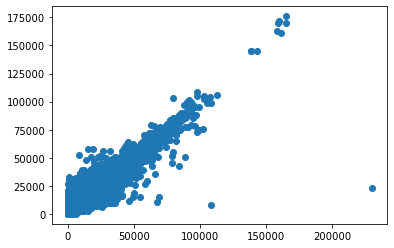

In [48]:
# What happens to the correlation as you increase the maximum selling price window
# Create a scatter plot with the relationship
plt.scatter(df['sellingprice'], df['mmr'])

As the selling price range increases the correlation also increasing. I will confirm the understading using values.

In [49]:
price_range = [10000, 20000, 30000, 40000, 50000]
for i in price_range:
  corr = df[df['sellingprice']<i][['sellingprice', 'mmr']].corr()['mmr'][0]
  print(f"The correlation for 0-{i} is {round(corr,2)} \n")


The correlation for 0-10000 is 0.87 

The correlation for 0-20000 is 0.95 

The correlation for 0-30000 is 0.97 

The correlation for 0-40000 is 0.98 

The correlation for 0-50000 is 0.98 



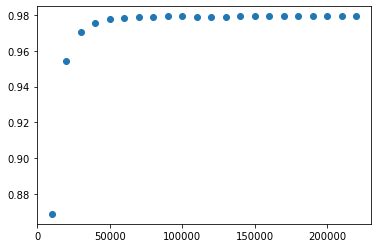

In [50]:
# Create a graph that shows how the correlation changes.
price_range = range(df['sellingprice'].min(), df['sellingprice'].max(), 10000)
corr_list = []
for i in price_range:
  corr = df[df['sellingprice']<i][['sellingprice', 'mmr']].corr()['mmr'][0]
  corr_list.append(corr)

plt.scatter(price_range, corr_list)

## Question 5. How does the distribution of `salesprice` vary by make for cars made between 2010-2015?
- Use the 10 most common makes (your cleaned version of this column).  
- Create a graph that answers this question.

,year,condition,odometer,mmr,sellingprice
count,267719.000000,267719.000000,267715.000000,267719.000000,267719.000000
mean,2012.571577,3.738269,41450.923105,16033.446263,15855.359227
std,1.233254,0.827211,28851.526667,7606.648363,7769.633010
min,2010.000000,1.000000,1.000000,1100.000000,1.000000
25%,2012.000000,3.300000,21839.000000,11200.000000,11000.000000
50%,2013.000000,3.900000,35711.000000,14050.000000,14000.000000
75%,2014.000000,4.300000,54260.500000,18850.000000,18800.000000
max,2015.000000,5.000000,999999.000000,176000.000000,230000.000000


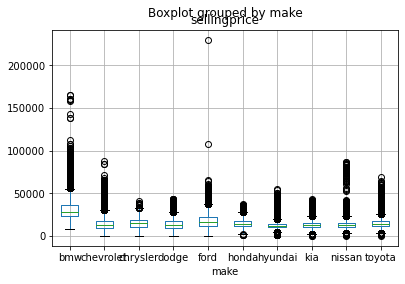

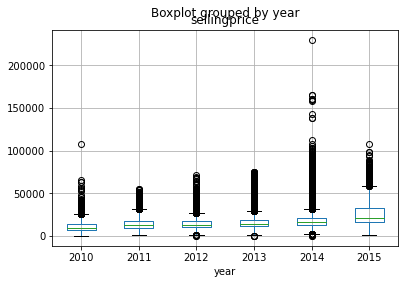

In [69]:

df_sale = df[df['year'].isin([2010, 2011,2012,2013,2014,2015])]

df_sale.boxplot('sellingprice', 'make')
df_sale.boxplot('sellingprice','year')
display(df_sale.describe())

The mean selling price is 15,853 and the maximum selling price is 230K. 

Reference link :

https://www.geeksforgeeks.org/exploring-correlation-in-python/

https://developer.mozilla.org/en-US/docs/Web/JavaScript/Reference/Global_Objects/Function/apply